# import and open training

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('01-census-income.csv')

In [4]:
df.head()

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No
1,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,No
2,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,Yes
3,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,Yes
4,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,Yes


In [5]:
df.columns

Index(['age', 'workclass', 'weight', 'education', 'edu num', 'marital status',
       'occupation', 'relationship', 'race', 'sex', 'captial-gain',
       'capital-loss', 'hours-per-week', 'native country', 'label'],
      dtype='object')

<h2> แบ่ง columns กับ Feature </h2>

In [19]:
y_train=df['label']
y_train

0         No
1         No
2        Yes
3        Yes
4        Yes
        ... 
33869     No
33870     No
33871     No
33872     No
33873    Yes
Name: label, Length: 33874, dtype: object

In [20]:
X_train=df[['age','edu num','captial-gain','capital-loss','hours-per-week']]
X_train

,age,edu num,captial-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,37,14,0,0,40
2,42,13,5178,0,40
3,30,13,0,0,40
4,40,11,0,0,40
...,...,...,...,...,...
33869,33,13,0,0,40
33870,64,9,0,0,40
33871,38,13,0,0,50
33872,44,13,5455,0,40


<p> select บาง columns เพื่อมา Train </p>

# Knn model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn=KNeighborsClassifier(n_neighbors=7)# สร้าง object
knn.fit(X_train,y_train) #ให้เรียนรู้

KNeighborsClassifier(n_neighbors=7)

**predict โดยไม่สร้างตาราง**

In [29]:
knn.predict([[45,16,0,0,60],
             [24,16,0,0,40]])# ทำนาย 2 คน

array(['Yes', 'No'], dtype=object)

**predict โดยสร้างตาราง**

In [30]:
#แบบสร้างตาราง
new_data=pd.DataFrame([[45,16,0,0,60],[24,16,0,0,40]],columns=X_train.columns)
new_data

,age,edu num,captial-gain,capital-loss,hours-per-week
0,45,16,0,0,60
1,24,16,0,0,40


In [31]:
knn.predict(new_data)

array(['Yes', 'No'], dtype=object)

**predict ของTest**

In [32]:
knn.predict(X_train) 

array(['No', 'No', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype=object)

**predict ของTrain**

# score with train set

In [33]:
knn.score(X_train,y_train) #คะแนนข้อมูลที่ train เอง

0.8510657141170219

# score with test set

In [34]:
# unseen เอาไว้ใช้ครั้งสุดท้ายครั้งเดียว
df2=pd.read_csv('02-future-census.csv')
df2.head()

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native country,label
0,32,Private,241802,HS-grad,9,Married-civ-spouse,Other-service,Wife,Other,Female,0,0,40,United-States,No
1,81,Private,164416,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,Yes
2,17,Self-emp-inc,181608,10th,6,Never-married,Sales,Own-child,White,Male,0,0,12,United-States,No
3,36,Private,289223,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1848,40,United-States,Yes
4,54,Private,351760,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,35,United-States,No


In [35]:
X_test=df2[['age','edu num','captial-gain','capital-loss','hours-per-week']]
X_test

,age,edu num,captial-gain,capital-loss,hours-per-week
0,32,9,0,0,40
1,81,15,0,0,45
2,17,6,0,0,12
3,36,10,0,1848,40
4,54,10,0,0,35
...,...,...,...,...,...
9763,48,9,0,0,40
9764,21,10,2174,0,40
9765,57,9,0,0,60
9766,52,2,0,0,50


**Select บาง columns**

In [36]:
y_test=df2['label']
y_test

0        No
1       Yes
2        No
3       Yes
4        No
       ... 
9763     No
9764     No
9765    Yes
9766    Yes
9767     No
Name: label, Length: 9768, dtype: object

In [37]:
knn.score(X_test,y_test)# test

0.8279074529074529

# train test split - กรณีที่มี File เดียว

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2)

In [41]:
knn2=KNeighborsClassifier(n_neighbors=29)

<h2> Train </h2>

In [42]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [43]:
knn2.score(X_train,y_train)

0.8456769622495295

<h2> Test

In [44]:
knn2.score(X_test,y_test)#ปรับให้เปอร์เซ็นของชุด train test ใกล้เคียงกัน

0.8348339483394834

<h2> retrain with all data </h2>

In [45]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [46]:
knn2.score(X_train,y_train)

0.8456769622495295

In [47]:
knn2.score(X_test,y_test)

0.8348339483394834

**ไม่ดีเพราะการทำแบบนี้การเรียนรู้จะไม่ได้พัฒนามาก**

# cross-validation 

**เอาข้อมูลชุด Train แบ่งเป็น K ส่วน เพื่อ สร้าง model มา K ตัว และ Train**

## แบบปกติ ไม่มีการ Cross 

In [48]:
#เพื่อสร้างโมเดลที่กำหนดค่า hyperparameter
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.2)
knn3=KNeighborsClassifier(n_neighbors=29)
knn3.fit(X_train,y_train)
knn3.score(X_train, y_train)

0.8441348770699756

**Score Train**

In [49]:
knn3.score(X_test,y_test)

0.8352398523985239

**Score Test**

## แบบ Cross validation

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
knn_cv = KNeighborsClassifier(n_neighbors=29)

In [60]:
knn_29_cv_result=cross_val_score( knn_cv, X_train, y_train, cv=10)# ทำ 10 รอบ

In [61]:
knn_29_cv_result

array([0.84132841, 0.84086716, 0.84132841, 0.8404059 , 0.82333948,
       0.83210332, 0.82979705, 0.83902214, 0.83394834, 0.83710198])

In [62]:
knn_29_cv_result.mean()# หาค่าเฉลี่ย

0.8359242205712321

**เปลี่ยนค่า พารามิเตอร์**

In [63]:
knn_cv = KNeighborsClassifier(n_neighbors=35) # ทำเพื่อเช็ค
knn_35_cv_result=cross_val_score( knn_cv, X_train, y_train, cv=10)
knn_35_cv_result

array([0.83763838, 0.83717712, 0.84271218, 0.83994465, 0.82564576,
       0.82979705, 0.83071956, 0.83809963, 0.82564576, 0.83617905])

In [64]:
knn_35_cv_result.mean()

0.8343559123177757

**ไม่สามารถ run ค่า K-nn หลายๆค่าได้ (ต้องเปลี่ยนหลายรอบทำให้เปลืองพื้นที่)**

# GridSearchCV

In [65]:
#ทำเพื่อไม่ต้องเปลี่ยนค่า k เอง
from sklearn.model_selection import GridSearchCV

In [67]:
knn_grid_search = KNeighborsClassifier()

In [68]:
parameter_grid={'n_neighbors':[15,17,19,21,23,25,27,29,31,35]} #dic ที่เก็บค่าที่จะปรับเรื่อยๆ

In [69]:
grid_search= GridSearchCV(knn_grid_search, parameter_grid,cv=10)

In [70]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [15, 17, 19, 21, 23, 25, 27, 29, 31,
                                         35]})

In [71]:
grid_search.best_params_ #parameter ที่ได้คะแนนดีสุด

{'n_neighbors': 29}

In [72]:
grid_search.best_score_ #คะแนนดีสุด

0.8359242205712321

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.11415088, 0.05767572, 0.05767939, 0.06742735, 0.07154691,
        0.06079679, 0.06044424, 0.05906901, 0.05758069, 0.05862844]),
 'mean_score_time': array([0.56999304, 0.27593231, 0.27593598, 0.3486306 , 0.35076513,
        0.27855542, 0.28700085, 0.29111748, 0.29354804, 0.29072685]),
 'mean_test_score': array([0.83397257, 0.83618674, 0.83651149, 0.83592131, 0.83683641,
        0.83677738, 0.83733832, 0.83701371, 0.83627574, 0.83580327]),
 'param_n_neighbors': masked_array(data=[15, 17, 19, 21, 23, 25, 27, 29, 31, 35],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 15},
  {'n_neighbors': 17},
  {'n_neighbors': 19},
  {'n_neighbors': 21},
  {'n_neighbors': 23},
  {'n_neighbors': 25},
  {'n_neighbors': 27},
  {'n_neighbors': 29},
  {'n_neighbors': 31},
  {'n_neighbors': 35}],
 'rank_test_score': array([10,  7,  5,  8,  3

In [73]:
grid_search.predict(X_train)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [76]:
grid_search.score(X_train,y_train)

0.8441348770699756

In [77]:
grid_search.score(X_test,y_test)

0.8352398523985239

# การปรับ columns ด้วย Std ใน Grid

**data preprocessing** </br>
**Standard Scaler**

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [94]:
X_train_transformed = std_scaler.transform(X_train)
X_test_transformed = std_scaler.transform(X_test)

**Transform X_Train, X_test**

In [95]:
grid_search_transformed = GridSearchCV(knn_grid_search,parameter_grid,cv=10)

In [96]:
grid_search_transformed.fit(X_train_transformed,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [15, 17, 19, 21, 23, 25, 27, 29, 31,
                                         35]})

In [85]:
grid_search_transformed.best_params_, grid_search_transformed.best_score_

({'n_neighbors': 27}, 0.8266985536145162)

In [89]:
grid_search.best_score_,grid_search_transformed.best_score_

(0.8359242205712321, 0.8266985536145162)

**น้อยลงจากกว่าการไม่ทำ preprocessing แต่ไม่ได้แปลว่าดีกว่า ต้องวัด score จาก Test**
grid_search.best_score_

In [87]:
grid_search.score(X_train,y_train), grid_search_transformed.score(X_train_transformed,y_train)

(0.8441348770699756, 0.8344942109875917)

In [91]:
grid_search.score(X_test,y_test), grid_search_transformed.score(X_test_transformed,y_test)

(0.8352398523985239, 0.8208487084870849)

**การ preprocess ทำให้ score drop ลงมา (ยอมรับได้)**

**กรณีเจอ best k ที่เป็นค่าขอบแปลว่าอาจจะมี k ที่ดีกว่านี้**

**grid_search bestscore คือ คะแนนที่ดีที่สุดเฉลี่ยการ cross 10 ครั้ง** </br>
**grid_search score คือ คะแนนของทุก dataset ที่ train**

# Column Transformer

**use pipeline**

In [101]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [99]:
df.columns

Index(['age', 'workclass', 'weight', 'education', 'edu num', 'marital status',
       'occupation', 'relationship', 'race', 'sex', 'captial-gain',
       'capital-loss', 'hours-per-week', 'native country', 'label'],
      dtype='object')

In [109]:
transfomer = make_column_transformer(
    (StandardScaler(),['age','edu num','captial-gain','capital-loss','hours-per-week']),
    (OneHotEncoder(), ['marital status','occupation','sex'])

)

In [110]:
X_train = df[['age','edu num','captial-gain','capital-loss','hours-per-week',
'marital status','occupation','sex']]
X_test =  df2[['age','edu num','captial-gain','capital-loss','hours-per-week',
'marital status','occupation','sex']]

In [111]:
transfomer.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'edu num', 'captial-gain',
                                  'capital-loss', 'hours-per-week']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['marital status', 'occupation', 'sex'])])

In [116]:
X_train_transformed = transfomer.transform(X_train)
X_test_transformed = transfomer.transform(X_test)

In [117]:
X_train_transformed.toarray()

array([[ 0.02800396,  1.14101626,  0.15581484, ...,  0.        ,
         0.        ,  1.        ],
       [-0.1180703 ,  1.53000586, -0.14593817, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24711536,  1.14101626,  0.57277254, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.04503317,  1.14101626, -0.14593817, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.39318962,  1.14101626,  0.61122037, ...,  0.        ,
         0.        ,  1.        ],
       [-0.26414456,  1.14101626, -0.14593817, ...,  0.        ,
         0.        ,  1.        ]])

<h2> ทำ GridSearch </h2>

In [120]:
grid_search_transformed.fit(X_train_transformed,df.label)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [15, 17, 19, 21, 23, 25, 27, 29, 31,
                                         35]})

In [122]:
grid_search_transformed.best_params_

{'n_neighbors': 35}

In [123]:
grid_search_transformed.best_score_

0.8477595685845142

In [125]:
y_predicted = grid_search_transformed.predict(X_test_transformed)

# Other Metric

In [121]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [127]:
accuracy_score(df2.label,y_predicted) ## สนใจ class ทั้งสอง class เท่ากัน

0.8422399672399672

In [130]:
grid_search_transformed.score(X_test_transformed,df2.label) ## สนใจ class ทั้งสอง class เท่ากัน

0.8422399672399672

In [132]:
recall_score(df2.label,y_predicted,pos_label="Yes") ##สนใจด้านที่เป็นลบมากกว่า (เรียกคืนคนที่เป็นด้านลบ) สมมุติ detect คนเงินเกิน 5 หมื่นเป็นผู้สงสัย detect คนเป็นผู้ต้องสงสัยได้ 60%

0.6030341340075853

In [134]:
precision_score(df2.label,y_predicted,pos_label="Yes") #เป็นการdetect ผู้ต้องสงสัย แต่ยอมให้มีการ detect พลาดด้วย 70%

0.7049261083743842

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [144]:
confusion_matrix(df2.label,y_predicted)

array([[6796,  599],
       [ 942, 1431]], dtype=int64)

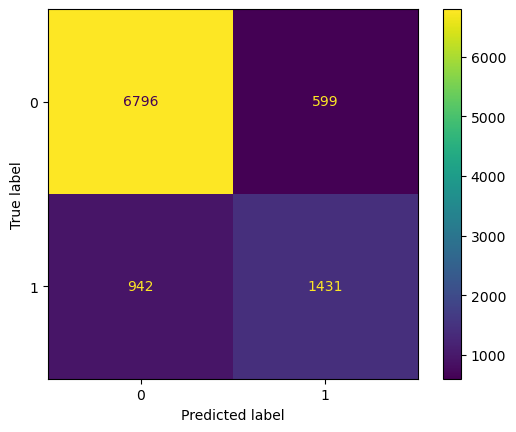

In [157]:
ConfusionMatrixDisplay(confusion_matrix(df2.label,y_predicted)).plot()
plt.show()

## Fuzzy Classification

In [160]:
grid_search_transformed.classes_

array(['No', 'Yes'], dtype=object)

In [159]:
grid_search_transformed.predict_proba(X_test_transformed)

array([[0.94285714, 0.05714286],
       [0.42857143, 0.57142857],
       [1.        , 0.        ],
       ...,
       [0.4       , 0.6       ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429]])